# Tarefa de Análise de Dados - A1
O Dataset contém as informações de IDH, expectativa de vida e populações rural e urbana de cada Estado do Brasil.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset_Processo_Seletivo_UFRJ_Analytica_2024-2.csv")
df.head()

,ano,sigla_uf,expectativa_vida,populacao_urbana,populacao_rural,idhm
0,1991,AC,63.72,258520,159198,0.402
1,1991,AL,58.10,1482033,1032067,0.370
2,1991,AM,63.67,1502754,600489,0.430
3,1991,AP,65.05,234131,55266,0.472
4,1991,BA,59.94,7016770,4851221,0.386


### Verificação dos dados
A princípio, verifiquei se haviam dados faltantes, os períodos da série de dados e se os tipos de dados estavam de acordo com a necessidade de cada coluna. Dessa forma, não houve necessidade de tratamento dos dados recebidos.

In [3]:
missing_values = df.isnull().sum().sum()
print(f"A quantidade de dados faltantes é {missing_values}.")

year_series = sorted(list(set(df["ano"])))
print(f"O df contém dados para os anos de {year_series}.")

df.dtypes

A quantidade de dados faltantes é 0.
O df contém dados para os anos de [1991, 2000, 2010].


ano                   int64
sigla_uf             object
expectativa_vida    float64
populacao_urbana      int64
populacao_rural       int64
idhm                float64
dtype: object

### Estatísticas Descritivas
### IDH

É possível verificar que dentre os períodos apresentados, houve um aumento consistente no índice IDH do país. Esse aumento médio, entre 1991 e 2010, foi de 55.20% em panorama nacional. Em maior detalhe, vemos que em 1991 o Brasil enfrentava sérios problemas de desenvolvimento, comprovados em razão da média nacional de IDH baixa (0.453), somada à uma evidente desigualdade regional - afinal há uma grande diferença entre o índice do Distrito Federal (0.616) e do Maranhão (0.357). Em 2000, há uma tímida redução na desigualdade regional, embora a média e a mediana nacionais tenham aumentado de forma significativa. Além disso, não houve muitas mudanças no ranking dos maiores IDHs, uma vez que os mesmos Estados continuaram como os 5 primeiros colocados. Também é válido ressaltar que o posto de pior IDH foi transferido para AL, enquanto o MT conseguiu superar a média nacional. Por fim, em 2010, o crescimento do índice foi acentuado e paralelo a uma redução mais veemente da desigualdade regional, embora o ranking dos maiores IDHs tenha persistido, bem como a pior colocação para AL.

No que tange à distribuição dos IDHs por Estados, é fácil observar pelos histogramas dos períodos a evolução contínua das médias ao longo do tempo, inclusive com redução da variância.

In [4]:
idh_pct_change = (np.mean(df[df["ano"] == 2010]["idhm"]) / np.mean(df[df["ano"] == 1991]["idhm"]) - 1) * 100
print(f"Aumento percentual do IDH médio entre 2010 e 1991 = {idh_pct_change}% \n")

for year in year_series:

    df_filt = df[df["ano"] == year]

    # Média e Mediana
    idhm_mean = np.mean(df_filt["idhm"])
    idhm_median = np.median(df_filt["idhm"])
    print(f"Em {year}, a média do IDH foi {idhm_mean:.3f} e a mediana foi {idhm_median:.3f}.")

    # Estados acima da média
    above_avg = df_filt[df_filt["idhm"] >= idhm_mean]
    above_avg = above_avg["sigla_uf"].to_list()
    print(f"Os {len(above_avg)} Estados que ficaram acima da média do IDH nesse ano foram: {above_avg}")

    # Maiores IDHs
    greatest_idh = df_filt.drop(columns=["expectativa_vida", "populacao_urbana", "populacao_rural"]).sort_values(ascending=False, by="idhm").head(5)
    print(f"Inclusive, os 5 maiores IDHs desse ano foram: \n {greatest_idh}")

    # Máximo e mínimo
    max_idh = max(df_filt["idhm"])
    i_idhmax = df_filt["idhm"].idxmax()
    uf_idhmax = df_filt.loc[i_idhmax, "sigla_uf"]

    min_idh = min(df_filt["idhm"])
    i_idhmin = df_filt["idhm"].idxmin()
    uf_idhmin = df_filt.loc[i_idhmin, "sigla_uf"]

    print(f"Enquanto o estado com o maior IDH foi {uf_idhmax} ({max_idh:.3f}), o menor IDH foi do {uf_idhmin} ({min_idh:.3f}). \n")

Aumento percentual do IDH médio entre 2010 e 1991 = 55.20561357702356% 

Em 1991, a média do IDH foi 0.454 e a mediana foi 0.440.
Os 12 Estados que ficaram acima da média do IDH nesse ano foram: ['AP', 'DF', 'ES', 'GO', 'MG', 'MS', 'PR', 'RJ', 'RR', 'RS', 'SC', 'SP']
Inclusive, os 5 maiores IDHs desse ano foram: 
      ano sigla_uf   idhm
6   1991       DF  0.616
25  1991       SP  0.578
18  1991       RJ  0.573
23  1991       SC  0.543
22  1991       RS  0.542
Enquanto o estado com o maior IDH foi DF (0.616), o menor IDH foi do MA (0.357). 

Em 2000, a média do IDH foi 0.576 e a mediana foi 0.552.
Os 13 Estados que ficaram acima da média do IDH nesse ano foram: ['AP', 'DF', 'ES', 'GO', 'MG', 'MS', 'MT', 'PR', 'RJ', 'RR', 'RS', 'SC', 'SP']
Inclusive, os 5 maiores IDHs desse ano foram: 
      ano sigla_uf   idhm
33  2000       DF  0.725
52  2000       SP  0.702
50  2000       SC  0.674
49  2000       RS  0.664
45  2000       RJ  0.664
Enquanto o estado com o maior IDH foi DF (0.725), o 

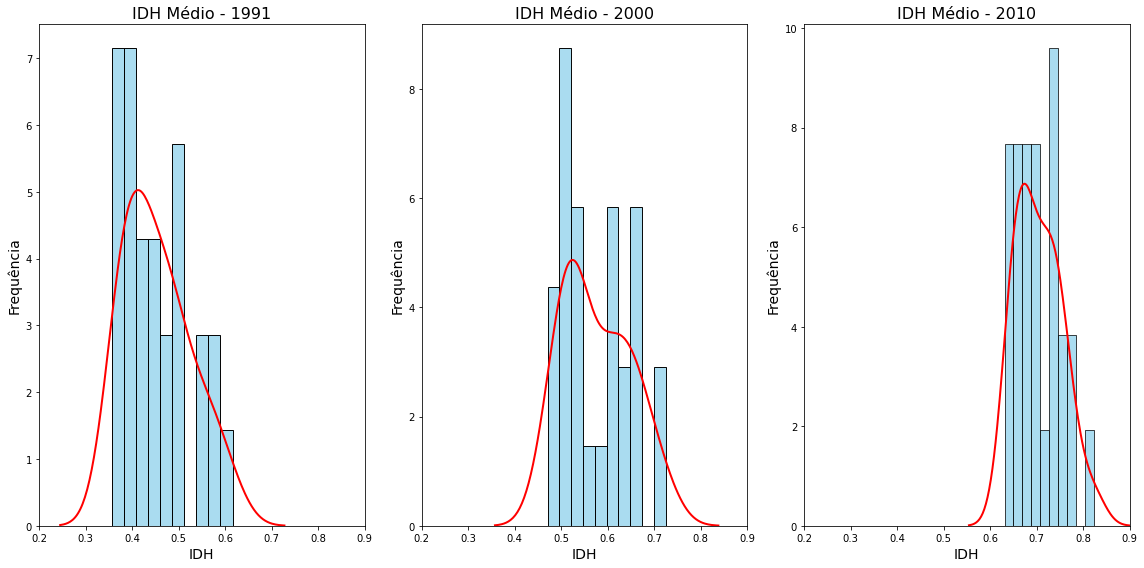

In [5]:
# Nível de Desigualdade
plt.figure(figsize=(16, 8))

for i, year in enumerate(year_series):
    ax = plt.subplot(1, len(year_series), i+1)
    ax.set(xlim=(0.2, 0.9))

    plt.title(f"IDH Médio - {year}", fontsize=16)
    plt.ylabel("Frequência", fontsize=14)
    plt.xlabel("IDH", fontsize=14)

    df_filt = df[df["ano"] == year]
    sns.histplot(df_filt["idhm"], bins=10, stat="density", color="skyblue", alpha=0.7, ax=ax)
    sns.kdeplot(df_filt["idhm"], color="red", linewidth=2, ax=ax)

plt.tight_layout()
plt.show()

#### População Urbana
Quanto à população urbana, podemos verificar que o crescimento mais acentuado se deu entre 1991 e 2000, com um aumento de 7% em relação à população total. A melhora do IDH foi, então, precedida por um processo de urbanização.

<function matplotlib.pyplot.show(close=None, block=None)>

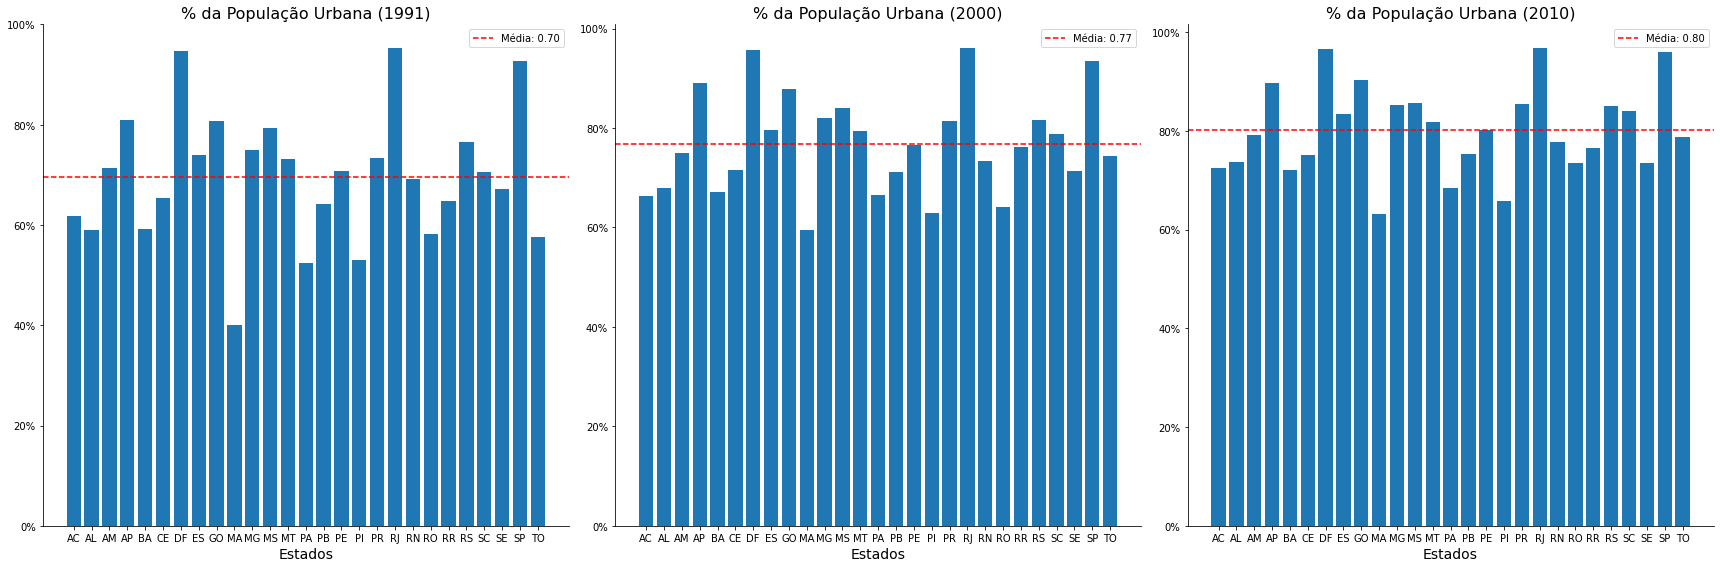

In [6]:
# Proporção da população urbana
df["pct_pop_urb"] = df.loc[:, "populacao_urbana"]/(df.loc[:, "populacao_urbana"] + df.loc[:, "populacao_rural"])

plt.figure(figsize=(24,8))

for i, year in enumerate(year_series):
    ax = plt.subplot(1, len(year_series), i+1)

    for spine in ["right", "top"]:
        ax.spines[spine].set_color("none")

    plt.title(f"% da População Urbana ({year})", fontsize=16)
    plt.xlabel("Estados", fontsize=14)

    df_filt = df[df["ano"] == year]
    pop_urb_mean = np.mean(df_filt["pct_pop_urb"])

    plt.bar(df_filt["sigla_uf"], df_filt["pct_pop_urb"])
    plt.axhline(y=pop_urb_mean, color="red", linestyle="--", label=f"Média: {pop_urb_mean:.2f}")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend()

plt.tight_layout()
plt.show

#### IDH x Expectativa de Vida
Os gráficos nos mostram que existe uma correlação positiva entre as variáveis, já que, quanto maior o IDH, maior a expectativa de vida da população. Por meio da visualização dos gráficos também vemos que há uma redução na dispersão dos dados, sobretudo entre 1991 e 2010.

<function matplotlib.pyplot.show(close=None, block=None)>

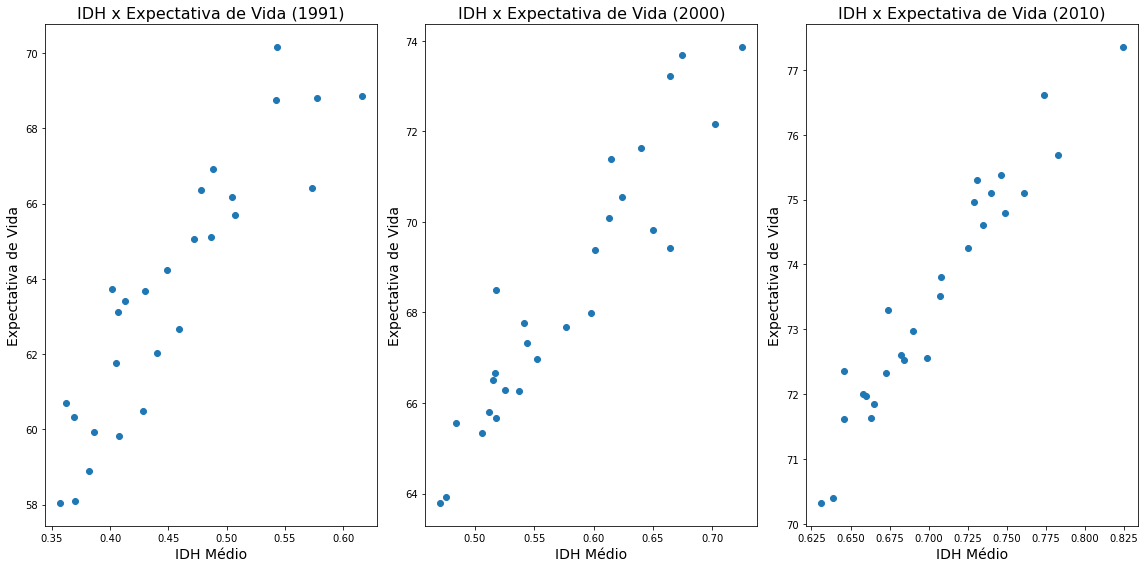

In [7]:
# Correlação entre IDH e Expectativa de vida
plt.figure(figsize=(16, 8))

for i, year in enumerate(year_series):
    ax = plt.subplot(1, len(year_series), i+1)
    #fig, ax = plt.subplots(figsize = (14,8))

    plt.title(f"IDH x Expectativa de Vida ({year})", fontsize=16)
    plt.xlabel("IDH Médio", fontsize=14)
    plt.ylabel("Expectativa de Vida", fontsize=14)

    df_filt = df[df["ano"] == year]
    plt.scatter(df_filt["idhm"], df_filt["expectativa_vida"])

plt.tight_layout()
plt.show

ano        1991   2010  diferenca
sigla_uf                         
AC        63.72  71.63       7.91
AL        58.10  70.32      12.22
AM        63.67  73.30       9.63
AP        65.05  73.80       8.75
BA        59.94  71.97      12.03
CE        61.76  72.60      10.84
DF        68.87  77.35       8.48
ES        66.17  75.10       8.93
GO        65.10  74.60       9.50
MA        58.04  70.40      12.36
MG        66.36  75.30       8.94
MS        66.93  74.96       8.03
MT        64.24  74.25      10.01
PA        63.42  72.36       8.94
PB        58.88  72.00      13.12
PE        62.04  72.32      10.28
PI        60.71  71.62      10.91
PR        65.71  74.80       9.09
RJ        66.42  75.10       8.68
RN        60.48  72.52      12.04
RO        63.11  72.97       9.86
RR        62.66  73.51      10.85
RS        68.76  75.38       6.62
SC        70.16  76.61       6.45
SE        59.83  71.84      12.01
SP        68.82  75.69       6.87
TO        60.32  72.56      12.24


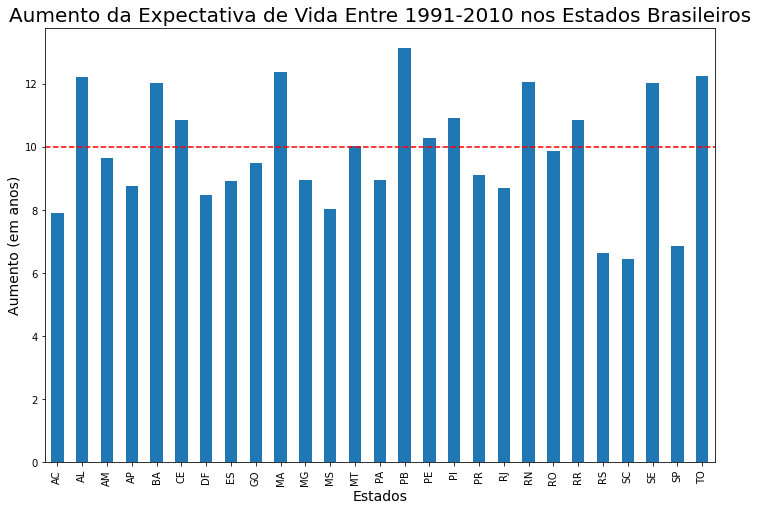

Os Estados cujo aumento da expectativa foi maior que 10 anos entre 1991-2010 foram ['AL', 'BA', 'CE', 'MA', 'MT', 'PB', 'PE', 'PI', 'RN', 'RR', 'SE', 'TO'].


In [8]:
# Evolução da Expectativa de Vida
dif_expec_vida = df.pivot(index="sigla_uf", columns="ano", values="expectativa_vida")
dif_expec_vida = dif_expec_vida.drop(columns=2000)
dif_expec_vida["diferenca"] = dif_expec_vida.loc[:, 2010] - dif_expec_vida.loc[:, 1991]
print(dif_expec_vida)

dif_expec_vida["diferenca"].plot(kind="bar", figsize=(12,8))
plt.axhline(y=10, color="red", linestyle="--")

plt.title("Aumento da Expectativa de Vida Entre 1991-2010 nos Estados Brasileiros", fontsize=20)
plt.xlabel("Estados", fontsize=14)
plt.ylabel("Aumento (em anos)", fontsize=14)

plt.show()

increase_10y = dif_expec_vida[dif_expec_vida["diferenca"] >= 10].index.to_list()
print(f"Os Estados cujo aumento da expectativa foi maior que 10 anos entre 1991-2010 foram {increase_10y}.")
